##### Note: Use python version 3.6.0
#### Bank Marketing Campaign Success Predictor
#### By - Shreya Prabhu Student Id: W1268563

#### About the Project:
The dataset used is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were basedprimarily on calls made via phone or landline(telephone). Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. This project aims to measure the success of the bank's marketing campaign by predict whether a customer will be subscribe for a product.
<br>Data source: The data was extracted from the  UCI Machine learning repository:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import os
import io
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

### Loading the dataset and reading the raw input file which contains all the customer details

In [2]:
df = pd.read_csv('bank-full.csv', header = 0)
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


## Data Cleaning

### Spliting the column with the delimiter ";" 

In [3]:
details = df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

In [4]:
details.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


## Input variables: Renaming the columns with meaningful values
   #### Bank client data:
   0 - Age (numeric)
   <br> 1 - Job Category:  type of job (Categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur",      "student", "blue-collar","self-employed","retired","technician","services")
    <br>2 - Marital Status : marital status (Categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   <br>3 - Education (Categorical: "unknown","secondary","primary","tertiary")
   <br>4 - Credt Default: if the person has credit in default? (Values: "yes","no")
   <br>5 - Balance[Euro]: Average Yearly Balance, in euros (numeric) 
   <br>6 - House Loan: Has the person taken a Housing Loan? (binary: "yes","no")
   <br>7 - loan: has personal loan? (binary: "yes","no")
   #### Related with the last contact of the current campaign:
   8 - Contact: Contact communication type (Categorical: "unknown","telephone","cellular") 
   <br>9 - DayLastContact: Last contact day of the month (numeric)
   <br>10 - MonLastContact: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   <br>11 - Duration(Sec): Duration of the Call in the last contact, in seconds (numeric)
   #### Other attributes:
  12 - No.of Contacts: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
  <br>13 - Passed Days: Number of days passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  #### Previous campaign attributes:
  14 - No.ContactsBefore: Number of contacts performed before this campaign and for this client (numeric)
  <br>15 - POutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  <br>16 - Has the client subscribed a term deposit? (Values: "yes","no")

In [5]:
details.columns = ['Age','Job_Category','Marital_Status','Education','Credit_Default','Balance[Euro]','House_Loan','Personal_Loan','Contact_Type','DayLastContact','MonLastContact','Duration(Sec)','No.ofContacts','Passed_Days','No.ContactsBefore','POutcome', 'Subscribed']

In [6]:
details.head()

,Age,Job_Category,Marital_Status,Education,Credit_Default,Balance[Euro],House_Loan,Personal_Loan,Contact_Type,DayLastContact,MonLastContact,Duration(Sec),No.ofContacts,Passed_Days,No.ContactsBefore,POutcome,Subscribed
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


#### The dataset is old and hence DayLastContact and MonLastContact that pertain to the previous year are irrelevant in our case. Hence deleting these from the dataframe.


In [7]:
del details['DayLastContact']
del details['MonLastContact']

#### It can be observed that all the values in data are prefixed and suffixed with a special character - ". The below function to delete the characters from each cell in the dataframe.

In [8]:
def replaceSpecialCharacters(str):
    return str.replace('"', '')
details = details.applymap(replaceSpecialCharacters)

In [9]:
details.head()

,Age,Job_Category,Marital_Status,Education,Credit_Default,Balance[Euro],House_Loan,Personal_Loan,Contact_Type,Duration(Sec),No.ofContacts,Passed_Days,No.ContactsBefore,POutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


## Data Exploration

In [10]:
details['POutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#### We will assume that customers for whom the POutcome value was either 'unknown' or 'other', the marketing campaign was not carried out before. Hence renaming the 'unknown' or 'other' values to 'notApplicable'.

In [11]:
details['POutcome'] = details['POutcome'].apply({'unknown':"notApplicable", 'other':"notApplicable",'failure':"failure", \
                                            'success': "success"}.get)

In [12]:
details['Contact_Type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

#### For better understanding, we will rename the value of contact type as mobile and landline. We will assume that when the Contact Type is unknown, it might be some other form of communication. Hence renaming the values which are 'unknown' as 'other'.

In [13]:
details['Contact_Type'] = details['Contact_Type'].apply({'unknown':"other", 'cellular':"mobile",'telephone':"landline"}.get)

In [14]:
details['Contact_Type'].unique()

array(['other', 'mobile', 'landline'], dtype=object)

#### Check if any cells in the dataframe have null values. From the below output, it can be confirmed that none of the cells have a null value.

In [15]:
details.isnull().sum()

Age                  0
Job_Category         0
Marital_Status       0
Education            0
Credit_Default       0
Balance[Euro]        0
House_Loan           0
Personal_Loan        0
Contact_Type         0
Duration(Sec)        0
No.ofContacts        0
Passed_Days          0
No.ContactsBefore    0
POutcome             0
Subscribed           0
dtype: int64

#### The dataset contains 45211 rows and 15 columns.

In [16]:
details.shape

(45211, 15)

In [17]:
details['Job_Category'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
details['Education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [19]:
details['Marital_Status'].unique()

array(['married', 'single', 'divorced'], dtype=object)

#### The 'Subscribed' column tell us whether the client subscribed to the term deposit or not. The target variable happens is the same. Renaming the values to binary: - yes - 1 and no - 0

In [20]:
d1 = {'yes': 1, 'no': 0} 
details['Subscribed'] = details['Subscribed'].map(d1)

In [21]:
details['Subscribed'].unique()

array([0, 1], dtype=int64)

#### Checking the datatype of each feature

In [22]:
details.dtypes

Age                  object
Job_Category         object
Marital_Status       object
Education            object
Credit_Default       object
Balance[Euro]        object
House_Loan           object
Personal_Loan        object
Contact_Type         object
Duration(Sec)        object
No.ofContacts        object
Passed_Days          object
No.ContactsBefore    object
POutcome             object
Subscribed            int64
dtype: object

#### Converting the datatype of the numeric featres from object to numeric.

In [23]:
 details[['Age','Balance[Euro]','Duration(Sec)','No.ofContacts','Passed_Days','No.ContactsBefore']] = details[['Age','Balance[Euro]','Duration(Sec)','No.ofContacts','Passed_Days','No.ContactsBefore']].apply(pd.to_numeric)

In [24]:
details.dtypes

Age                   int64
Job_Category         object
Marital_Status       object
Education            object
Credit_Default       object
Balance[Euro]         int64
House_Loan           object
Personal_Loan        object
Contact_Type         object
Duration(Sec)         int64
No.ofContacts         int64
Passed_Days           int64
No.ContactsBefore     int64
POutcome             object
Subscribed            int64
dtype: object

In [25]:
details.groupby('Subscribed').mean()

,Age,Balance[Euro],Duration(Sec),No.ofContacts,Passed_Days,No.ContactsBefore
Subscribed,,,,,,
0,40.838986,1303.714969,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354


The above details show the following:
1. The average age of the people subscribing for the term deposit is little higher than the people who not subscribing the deposit.
2. With no surprise, the average Balance in the accounts of the people who did not subscribe is lower than those who subscribed.
3. The calls with people who subscribed for the deposit, lasted for a longer duration. Hence greater the last call duration,
more chances of subscription. But Surprisingly, the number of calls made during the current campaign are lower for customers
who bought the term deposit.
4. There are more chances of getting a subscription if more number of calls are made to the customer than that made during
the previous campaign.

In [26]:
details['Subscribed'].value_counts()

0    39922
1     5289
Name: Subscribed, dtype: int64

## Data Visualizations

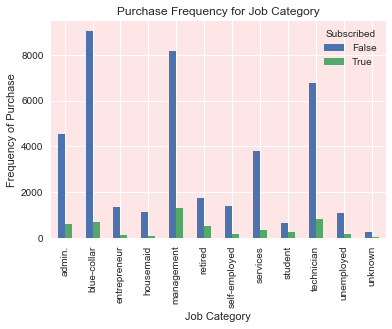

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(details.Job_Category,details.Subscribed.astype(bool)).plot(kind='bar')
plt.title('Purchase Frequency for Job Category')
plt.xlabel('Job Category')
plt.ylabel('Frequency of Purchase')
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### In the above figure we see that management people are more likely to subscribe to the product. Thus we can take this as one of our feaures.

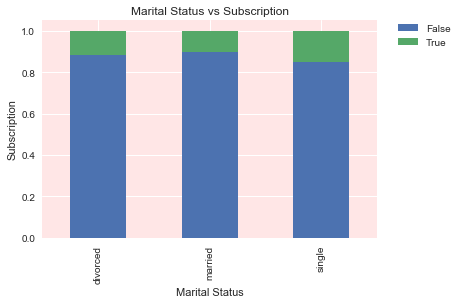

In [28]:
table = pd.crosstab(details.Marital_Status, details.Subscribed.astype(bool))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above figure suggests that if the customer is single, there are slightly more chances of gettng a subscription than the other categories.

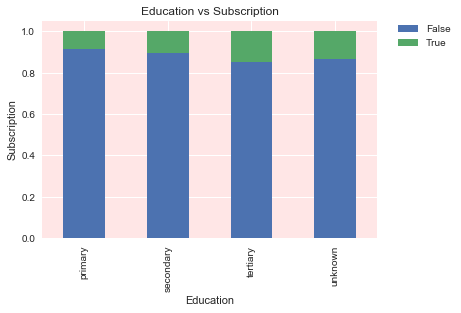

In [29]:
edu = pd.crosstab(details.Education, details.Subscribed.astype(bool))
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Education vs Subscription')
plt.xlabel('Education')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization suggests that the customers with only primary education are less likely to subscribe to product.

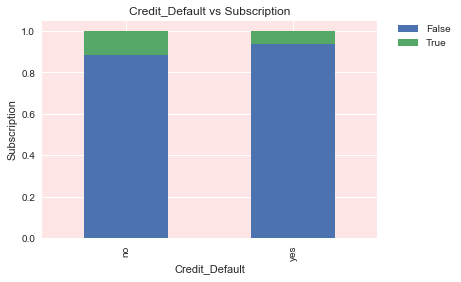

In [30]:
cd = pd.crosstab(details.Credit_Default, details.Subscribed.astype(bool))
cd.div(cd.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Credit_Default vs Subscription')
plt.xlabel('Credit_Default')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization suggests that the customers who do not have a credit default are more likely to subscribe. Hence this is a good feature.

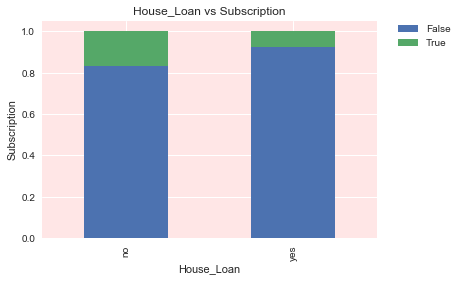

In [31]:
hd = pd.crosstab(details.House_Loan, details.Subscribed.astype(bool))
hd.div(hd.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('House_Loan vs Subscription')
plt.xlabel('House_Loan')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization shows the customers who do not have a house loan are more likely to subscribe.

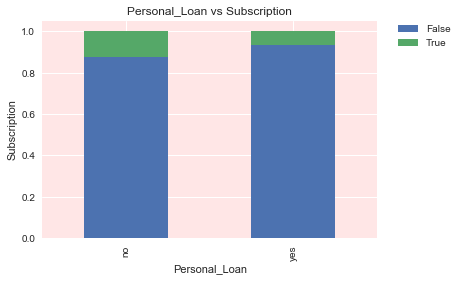

In [32]:
pl = pd.crosstab(details.Personal_Loan, details.Subscribed.astype(bool))
pl.div(pl.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Personal_Loan vs Subscription')
plt.xlabel('Personal_Loan')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization shows the customers who do not have a personal loan are more likely to subscribe.

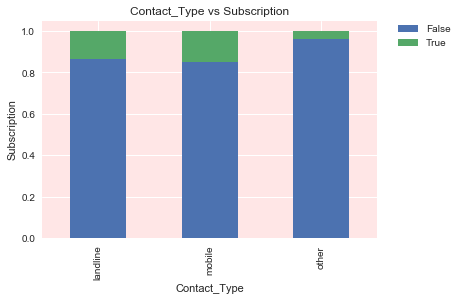

In [33]:
Ctype = pd.crosstab(details.Contact_Type, details.Subscribed.astype(bool))
Ctype.div(Ctype.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Contact_Type vs Subscription')
plt.xlabel('Contact_Type')
plt.ylabel('Subscription')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization shows that the customers when contacted through mobile and landline have more chances of getting converted than through other means.

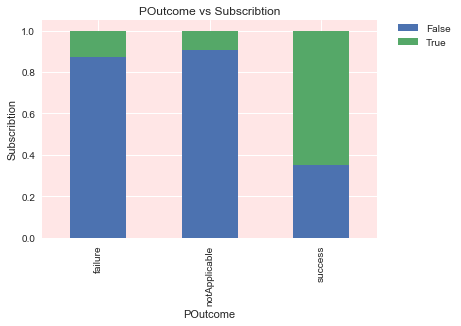

In [34]:
Pout = pd.crosstab(details.POutcome, details.Subscribed.astype(bool))
Pout.div(Pout.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('POutcome vs Subscribtion')
plt.xlabel('POutcome')
plt.ylabel('Subscribtion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
ax.set_facecolor((1.0, 0.9, 0.9))
plt.show()

#### The above visualization shows that customers for whom the previous marketing campaign was a success are more likely to subscribe in this campaign too.

## Feature Selection

After exploring the data and analyzing all the visualization, we conclude that except for DayLastContact: Last contact day of the month and MonLastContact:Last contact month of year, all other features would impact the chances of customer subscription.

## Building the Model

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

Since in this we have the find if the customer will subscribe to the product or not, logistc regression model seems to be a good fit. Hence we will use the same for makimg prediction. In this method, we derive the probability of customer subscribing to the term deposit.

#### Now, for the categorical variables, we will have dummy variables

In [35]:
categories=['Education','Marital_Status','Job_Category','Credit_Default','House_Loan','Personal_Loan','Contact_Type','POutcome']
for var in categories:
    category_list='var'+'_'+var
    category_list = pd.get_dummies(details[var], prefix=var)
    newdetails=details.join(category_list)
    details=newdetails
    

In [36]:
categories=['Education','Marital_Status','Job_Category','Credit_Default','House_Loan','Personal_Loan','Contact_Type','POutcome']
features=details.columns.values.tolist()
retaincategories=[i for i in features if i not in categories]


In [37]:
data_final=details[retaincategories]
data_final.columns.values

array(['Age', 'Balance[Euro]', 'Duration(Sec)', 'No.ofContacts',
       'Passed_Days', 'No.ContactsBefore', 'Subscribed',
       'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Education_unknown', 'Marital_Status_divorced',
       'Marital_Status_married', 'Marital_Status_single',
       'Job_Category_admin.', 'Job_Category_blue-collar',
       'Job_Category_entrepreneur', 'Job_Category_housemaid',
       'Job_Category_management', 'Job_Category_retired',
       'Job_Category_self-employed', 'Job_Category_services',
       'Job_Category_student', 'Job_Category_technician',
       'Job_Category_unemployed', 'Job_Category_unknown',
       'Credit_Default_no', 'Credit_Default_yes', 'House_Loan_no',
       'House_Loan_yes', 'Personal_Loan_no', 'Personal_Loan_yes',
       'Contact_Type_landline', 'Contact_Type_mobile',
       'Contact_Type_other', 'POutcome_failure', 'POutcome_notApplicable',
       'POutcome_success'], dtype=object)

In [38]:
data_final.head()

,Age,Balance[Euro],Duration(Sec),No.ofContacts,Passed_Days,No.ContactsBefore,Subscribed,Education_primary,Education_secondary,Education_tertiary,...,House_Loan_no,House_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Contact_Type_landline,Contact_Type_mobile,Contact_Type_other,POutcome_failure,POutcome_notApplicable,POutcome_success
0,58,2143,261,1,-1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
1,44,29,151,1,-1,0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
2,33,2,76,1,-1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
3,47,1506,92,1,-1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4,33,1,198,1,-1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


#### Determine the X and Y variables before fitting model:
X - features
<br>y - Class label ( 0 - if the customers will not subscribe, 1 - if the customer will subscribe)

In [39]:
cols=['Age', 'Balance[Euro]', 'Duration(Sec)', 'No.ofContacts',
       'Passed_Days', 'No.ContactsBefore', 'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Education_unknown', 'Marital_Status_divorced',
       'Marital_Status_married', 'Marital_Status_single',
       'Job_Category_admin.', 'Job_Category_blue-collar',
       'Job_Category_entrepreneur', 'Job_Category_housemaid',
       'Job_Category_management', 'Job_Category_retired',
       'Job_Category_self-employed', 'Job_Category_services',
       'Job_Category_student', 'Job_Category_technician',
       'Job_Category_unemployed', 'Job_Category_unknown',
       'Credit_Default_no', 'Credit_Default_yes', 'House_Loan_no',
       'House_Loan_yes', 'Personal_Loan_no', 'Personal_Loan_yes',
       'Contact_Type_landline', 'Contact_Type_mobile',
       'Contact_Type_other', 'POutcome_failure', 'POutcome_notApplicable',
       'POutcome_success'] 
X=data_final[cols]
y=data_final[ 'Subscribed']

In [40]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

G:\Misc\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###  Evaluate the model by splitting into train and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict class labels for the test set

In [42]:
y_pred = model.predict(X_test)
print (y_pred)

[0 1 0 ..., 0 0 0]


### Generate class probabilities

In [43]:
probs = model.predict_proba(X_test)
print (probs)

[[ 0.99262854  0.00737146]
 [ 0.30188088  0.69811912]
 [ 0.97460534  0.02539466]
 ..., 
 [ 0.99287561  0.00712439]
 [ 0.94184998  0.05815002]
 [ 0.95183455  0.04816545]]


### Generate evaluation metrics

In [44]:
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8967118844
0.878935578353


### Generate confusion metrics

In [45]:
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[11657   312]
 [ 1089   506]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     11969
          1       0.62      0.32      0.42      1595

avg / total       0.88      0.90      0.88     13564



## Now lets make predictions

### Example 1 : We want to predict whether a customer with the following details will subscribe for a term deposit?

'Age' - 25
'Balance[Euro]' - 4000
'Duration(Sec)' - 300
'No_of_Contacts' - 2,
'Passed_Days' - -1, 
'No.ContactsBefore'- 0,
'Education_primary' - 0
'Education_secondary' - 1, 
'Education_tertiary' - 0,
'Education_unknown' - 0,
'Marital_Status_divorced' - 1,
'Marital_Status_married' - 0, 
'Marital_Status_single' - 0,
'Job_Category_admin.' - 0,
'Job_Category_blue-collar' - 1,
'Job_Category_entrepreneur' - 0,
'Job_Category_housemaid' - 0,
'Job_Category_management' - 0,
'Job_Category_retired' - 0,
'Job_Category_self-employed' - 0, 
'Job_Category_services' - 0,
'Job_Category_student' - 0, 
'Job_Category_technician' - 0,
'Job_Category_unemployed' -  0,
'Job_Category_unknown' - 0,
'Credit_Default_no' - 1, 
'Credit_Default_yes' - 0,
'House_Loan_no' - 0,
'House_Loan_yes' - 1, 
'Personal_Loan_no' - 0,
'Personal_Loan_yes' - 1,
'Contact_Type_landline' - 1,
'Contact_Type_mobile' - 0,
'Contact_Type_other' - 0, 
'POutcome_failure'-0,
'POutcome_nonexistent' - 1,
'POutcome_success'- 0


In [47]:
model.predict_proba([[25,4000,300,2,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0]])

array([[ 0.96665697,  0.03334303]])

So the above values mean that the probability that the person will subscribe to the term deposit is 0.03.

In [48]:
## Thus it can be predicted that the customer will not subscribe for the term deposit.
model.predict([[25,4000,300,2,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0]])

array([0], dtype=int64)

### Example 2: We want to predict whether a customer with the following details will subscribe for a term deposit?

'Age' - 40
'Balance[Euro]' - 5000
'Duration(Sec)' - 400
'No_of_Contacts' - 2,
'Passed_Days' - 8, 
'No.ContactsBefore'- 50,
'Education_primary' - 0,
'Education_secondary' - 1, 
'Education_tertiary' - 0,
'Education_unknown' - 0,
'Marital_Status_divorced' - 0,
'Marital_Status_married' - 1, 
'Marital_Status_single' - 0,
'Job_Category_admin.' - 0,
'Job_Category_blue-collar' - 1,
'Job_Category_entrepreneur' - 0,
'Job_Category_housemaid' - 0,
'Job_Category_management' - 0,
'Job_Category_retired' - 0,
'Job_Category_self-employed' - 0, 
'Job_Category_services' - 0,
'Job_Category_student' - 0, 
'Job_Category_technician' - 0,
'Job_Category_unemployed' -  0,
'Job_Category_unknown' - 0,
'Credit_Default_no' - 1, 
'Credit_Default_yes' - 0,
'House_Loan_no' - 1,
'House_Loan_yes' - 0, 
'Personal_Loan_no' - 1,
'Personal_Loan_yes' - 0,
'Contact_Type_landline' - 0,
'Contact_Type_mobile' - 1,
'Contact_Type_other' - 0, 
'POutcome_failure'-0,
'POutcome_nonexistent' - 0,
'POutcome_success'- 1

In [49]:
model.predict_proba([[40,5000,400,2,8,50,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1]])

array([[ 0.17009127,  0.82990873]])

So the above values mean that the probability that the person will subscribe to the term deposit is 0.829

In [50]:
#Thus it can be predicted that the customer will subscribe for the term deposit.
model.predict([[40,5000,400,2,8,50,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1]])

array([1], dtype=int64)